In [1]:
"""
This code belongs to the paper:
-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 21 Storey building.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 21 Storey building.\n'

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 10000  # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            '''LINEAR PART DRIFT'''
            A = drift_mat(dof,k,c,m)
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y1.append(x[-1,:])   
        y2.append(x[-2,:])      

    y1 = np.array(y1)
    y2 = np.array(y2)

    return y1, y2

In [3]:
np.random.seed(1)
T = 3
dof = 21
x_initial = np.zeros(2*dof)

In [4]:
import time 
start = time.time()
y1, y2 = M_DOF_sys(x_initial, dof, T)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

ensemble  :  0
ensemble  :  10
ensemble  :  20
ensemble  :  30
ensemble  :  40
ensemble  :  50
ensemble  :  60
ensemble  :  70
ensemble  :  80
ensemble  :  90
ensemble  :  100
ensemble  :  110
ensemble  :  120
ensemble  :  130
ensemble  :  140
ensemble  :  150
ensemble  :  160
ensemble  :  170
ensemble  :  180
ensemble  :  190
ensemble  :  200
ensemble  :  210
ensemble  :  220
ensemble  :  230
ensemble  :  240
ensemble  :  250
ensemble  :  260
ensemble  :  270
ensemble  :  280
ensemble  :  290
ensemble  :  300
ensemble  :  310
ensemble  :  320
ensemble  :  330
ensemble  :  340
ensemble  :  350
ensemble  :  360
ensemble  :  370
ensemble  :  380
ensemble  :  390
ensemble  :  400
ensemble  :  410
ensemble  :  420
ensemble  :  430
ensemble  :  440
ensemble  :  450
ensemble  :  460
ensemble  :  470
ensemble  :  480
ensemble  :  490
ensemble  :  500
ensemble  :  510
ensemble  :  520
ensemble  :  530
ensemble  :  540
ensemble  :  550
ensemble  :  560
ensemble  :  570
ensemble  :  580
ensemble

ensemble  :  4620
ensemble  :  4630
ensemble  :  4640
ensemble  :  4650
ensemble  :  4660
ensemble  :  4670
ensemble  :  4680
ensemble  :  4690
ensemble  :  4700
ensemble  :  4710
ensemble  :  4720
ensemble  :  4730
ensemble  :  4740
ensemble  :  4750
ensemble  :  4760
ensemble  :  4770
ensemble  :  4780
ensemble  :  4790
ensemble  :  4800
ensemble  :  4810
ensemble  :  4820
ensemble  :  4830
ensemble  :  4840
ensemble  :  4850
ensemble  :  4860
ensemble  :  4870
ensemble  :  4880
ensemble  :  4890
ensemble  :  4900
ensemble  :  4910
ensemble  :  4920
ensemble  :  4930
ensemble  :  4940
ensemble  :  4950
ensemble  :  4960
ensemble  :  4970
ensemble  :  4980
ensemble  :  4990
ensemble  :  5000
ensemble  :  5010
ensemble  :  5020
ensemble  :  5030
ensemble  :  5040
ensemble  :  5050
ensemble  :  5060
ensemble  :  5070
ensemble  :  5080
ensemble  :  5090
ensemble  :  5100
ensemble  :  5110
ensemble  :  5120
ensemble  :  5130
ensemble  :  5140
ensemble  :  5150
ensemble  :  5160
ensemble  

ensemble  :  9180
ensemble  :  9190
ensemble  :  9200
ensemble  :  9210
ensemble  :  9220
ensemble  :  9230
ensemble  :  9240
ensemble  :  9250
ensemble  :  9260
ensemble  :  9270
ensemble  :  9280
ensemble  :  9290
ensemble  :  9300
ensemble  :  9310
ensemble  :  9320
ensemble  :  9330
ensemble  :  9340
ensemble  :  9350
ensemble  :  9360
ensemble  :  9370
ensemble  :  9380
ensemble  :  9390
ensemble  :  9400
ensemble  :  9410
ensemble  :  9420
ensemble  :  9430
ensemble  :  9440
ensemble  :  9450
ensemble  :  9460
ensemble  :  9470
ensemble  :  9480
ensemble  :  9490
ensemble  :  9500
ensemble  :  9510
ensemble  :  9520
ensemble  :  9530
ensemble  :  9540
ensemble  :  9550
ensemble  :  9560
ensemble  :  9570
ensemble  :  9580
ensemble  :  9590
ensemble  :  9600
ensemble  :  9610
ensemble  :  9620
ensemble  :  9630
ensemble  :  9640
ensemble  :  9650
ensemble  :  9660
ensemble  :  9670
ensemble  :  9680
ensemble  :  9690
ensemble  :  9700
ensemble  :  9710
ensemble  :  9720
ensemble  

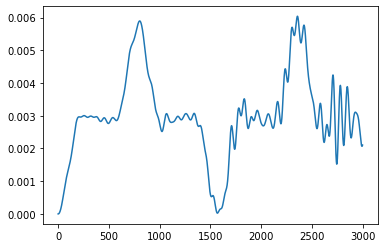

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.mean((y2), axis=0))
plt.show()

In [6]:
pickle.dump(y2, open('MDOF_actual_relia.p', 'wb'))